# BAL Figures
This notebook generates Figures 3a-d, S3 a-c, and S4 f.

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning)

In [3]:
data_dir = "/projects/b1038/Pulmonary/cpuritz/PASC/data"
v = "01integrated_BAL_GEO_v2"
adata = sc.read_h5ad(f"{data_dir}/01BAL/{v}/{v}.h5ad")

## Figure 3a

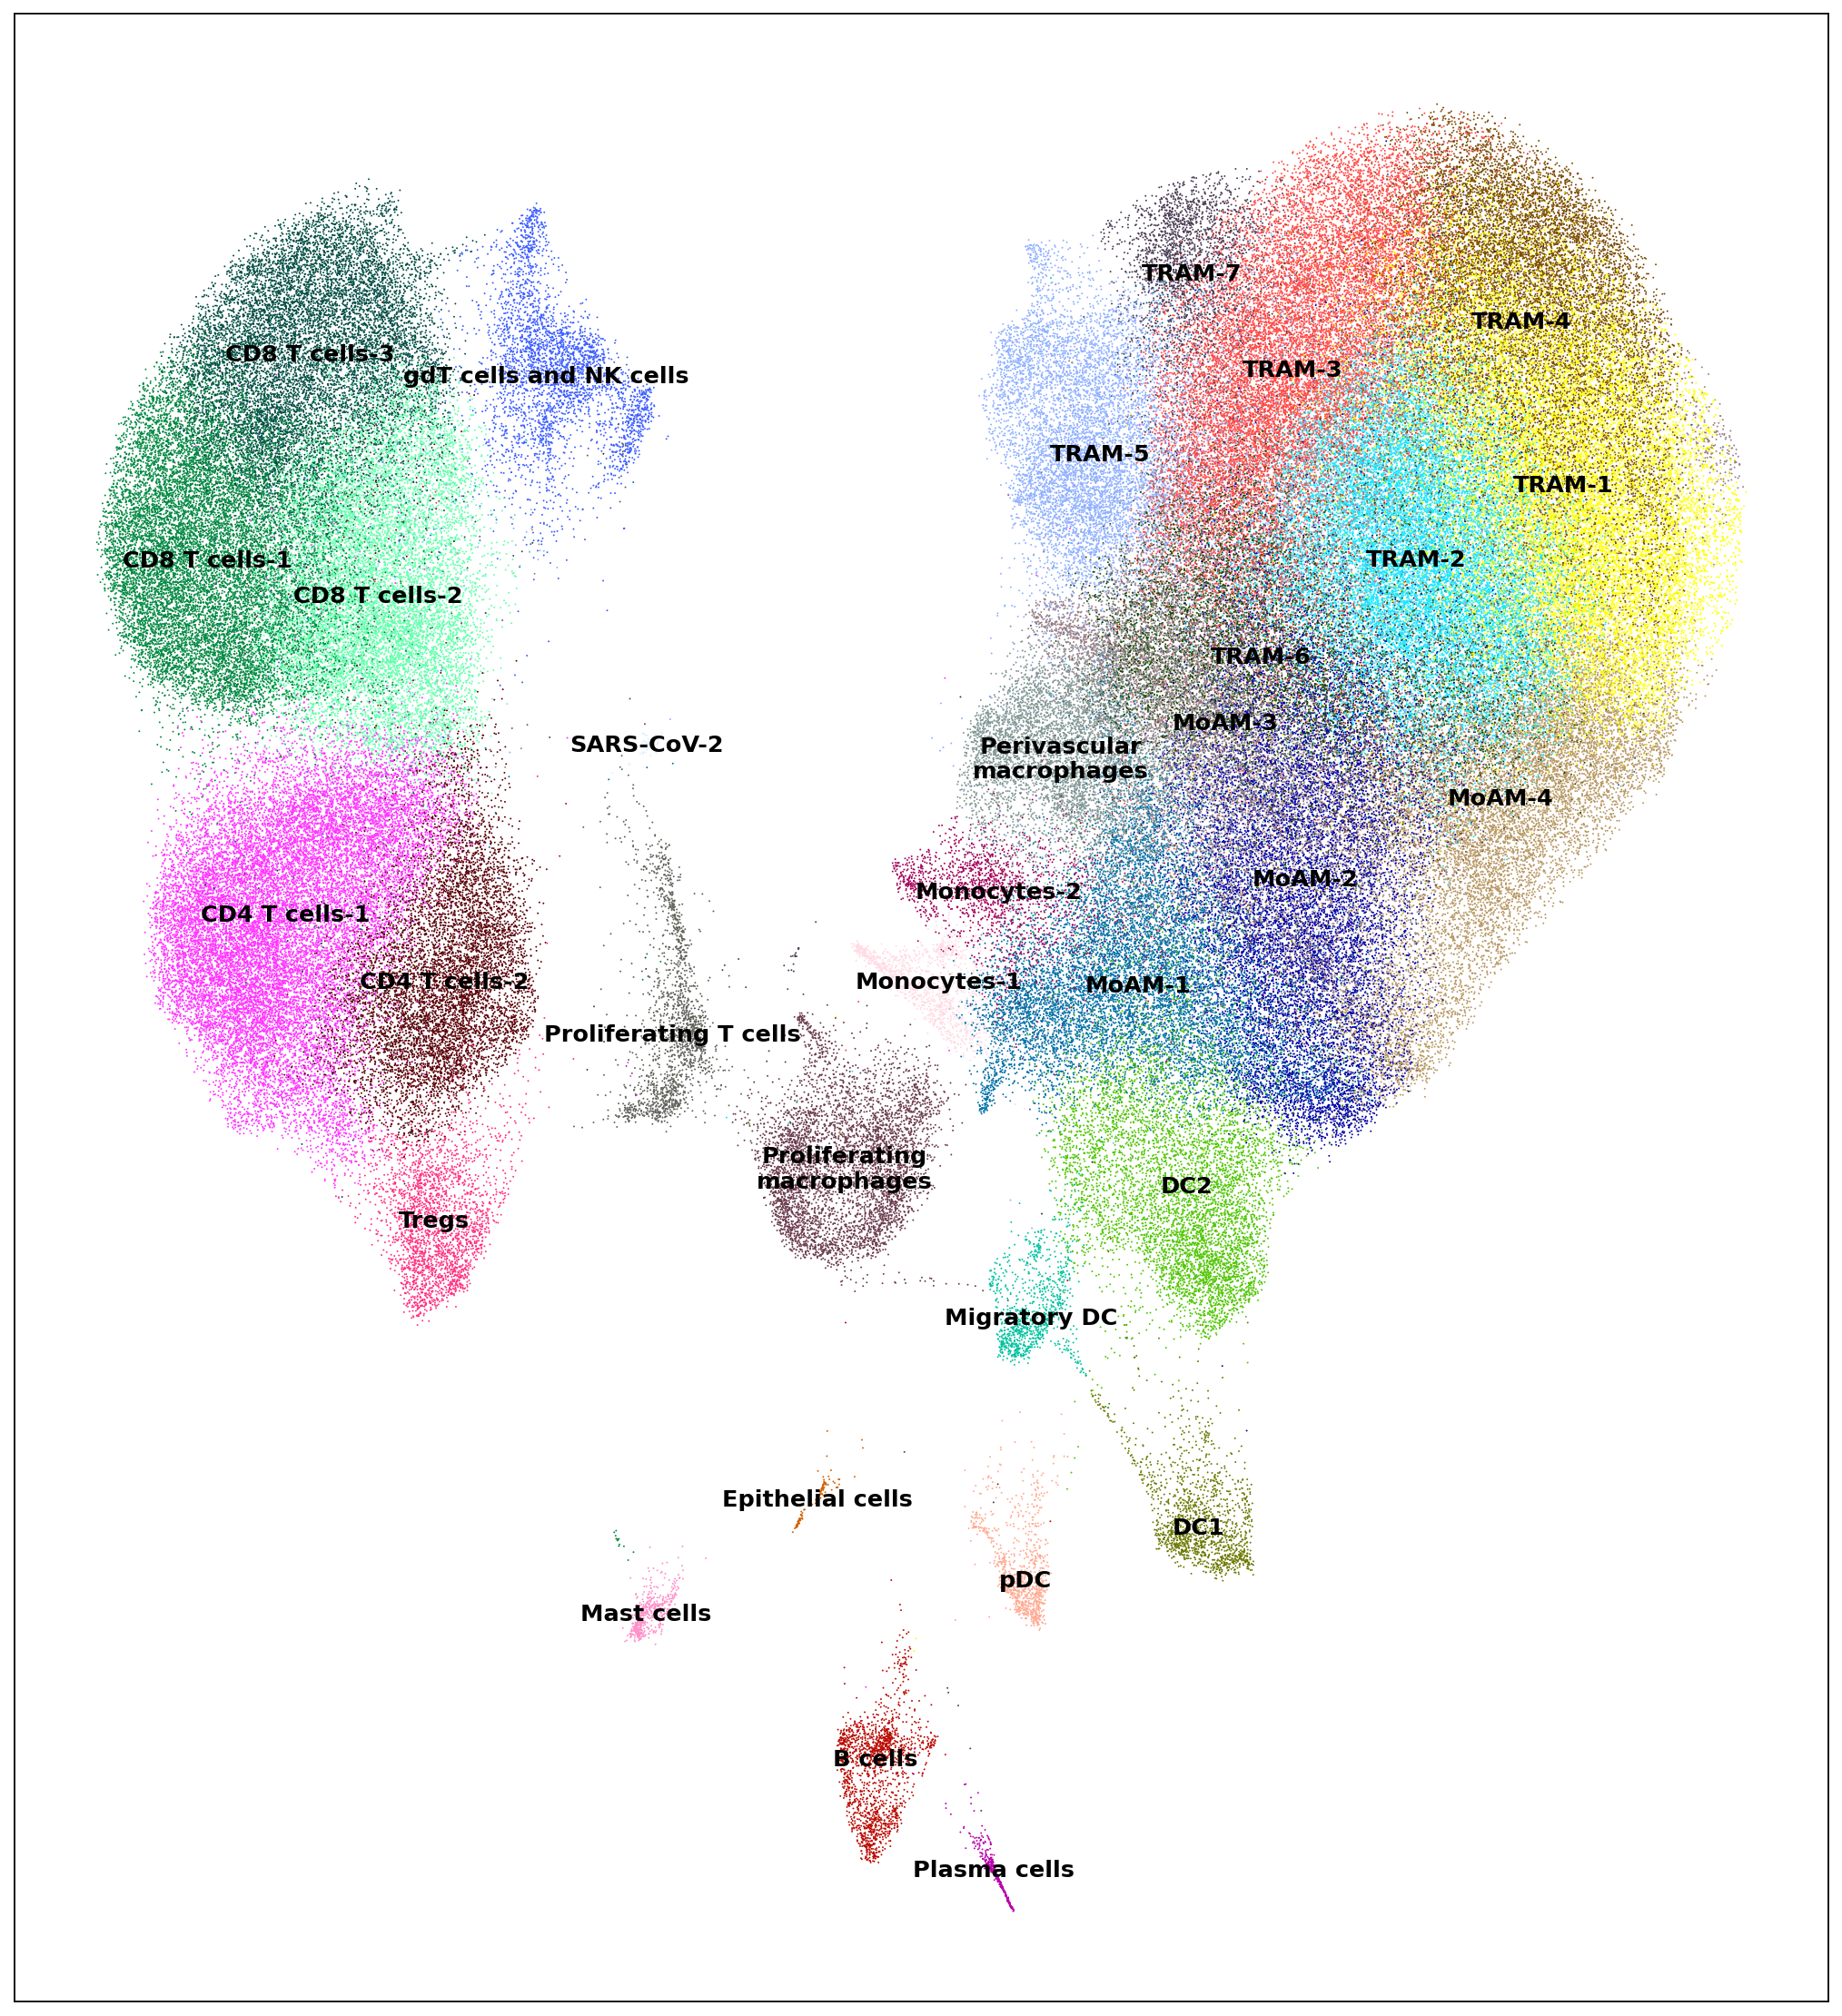

In [4]:
sc.set_figure_params(vector_friendly = True, dpi_save = 400, figsize = (16, 18), fontsize = 11.5)
um = sc.pl.umap(adata, color = "cell_type", legend_loc = "on data", frameon = True, title = "", size = 3,
                show = False)

um.texts[16].set_text(um.texts[16].get_text().replace(' ', '\n'))
um.texts[16].set_x(um.texts[16].get_unitless_position()[0] - 0.45)
um.texts[16].set_y(um.texts[16].get_unitless_position()[1] - 0.1)

um.texts[17].set_text(um.texts[17].get_text().replace(' ', '\n'))
um.texts[17].set_x(um.texts[17].get_unitless_position()[0] - 0.45)
um.texts[17].set_y(um.texts[17].get_unitless_position()[1] - 0.35)

plt.xlabel('')
plt.ylabel('')
plt.savefig(f"{data_dir}/figures/fig_3/fig_3a.pdf", bbox_inches = "tight", transparent = True)

## Figure 3b/c

In [5]:
sc.set_figure_params(vector_friendly = True, dpi_save = 300, fontsize = 14)

In [6]:
adata_rpra = adata[adata.obs.is_RPRA == 'True'].copy()
adata_ctrl = adata[adata.obs.is_RPRA == 'False'].copy()

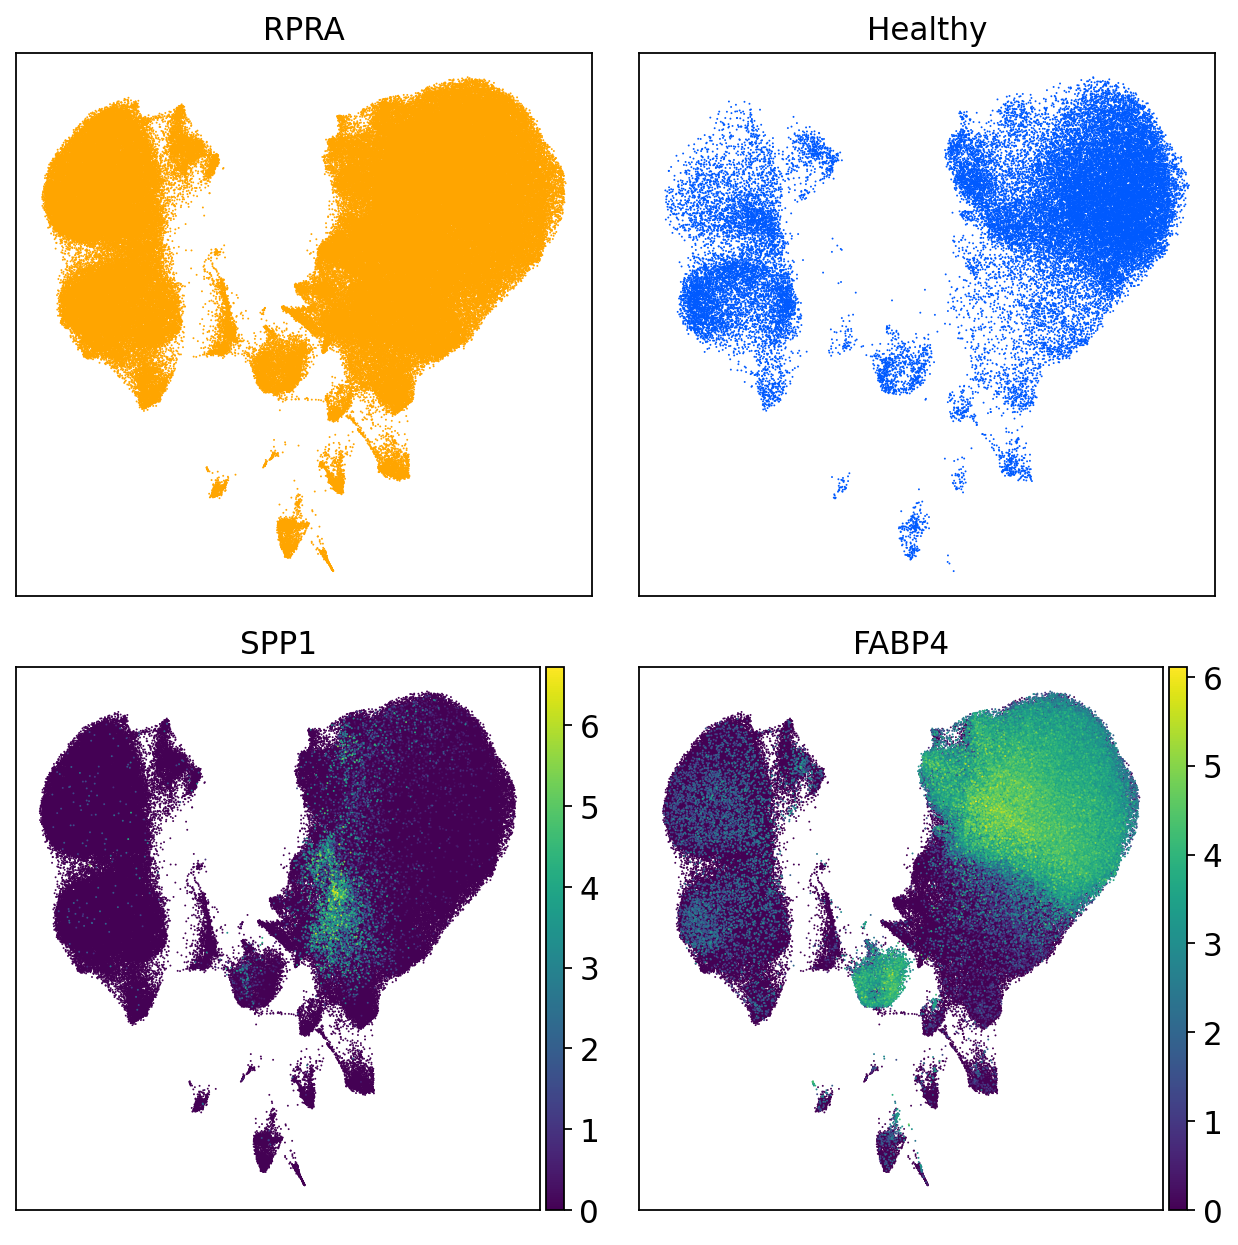

In [7]:
sc.set_figure_params(figsize = (8, 8))
fig, ax = plt.subplots(2, 2)

pal = {'False': '#005aff', 'True': '#ffa500'}
ps = 3

sc.pl.umap(adata_rpra, ax = ax[0, 0], show = False, title = 'RPRA', color = 'is_RPRA', palette = pal, size = ps)
sc.pl.umap(adata_ctrl, ax = ax[0, 1], show = False, title = 'Healthy', color = 'is_RPRA', palette = pal, size = ps)
sc.pl.umap(adata, ax = ax[1, 0], show = False, title = 'SPP1', color = 'SPP1', size = ps)
sc.pl.umap(adata, ax = ax[1, 1], show = False, title = 'FABP4', color = 'FABP4', size = ps)

ax[0, 0].get_legend().remove()
ax[0, 1].get_legend().remove()
for i in range(2):
    for j in range(2):
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('')
fig.tight_layout()
plt.savefig(f"{data_dir}/figures/fig_3/fig_3bc.pdf", bbox_inches = "tight", transparent = True)

## Figure 3d

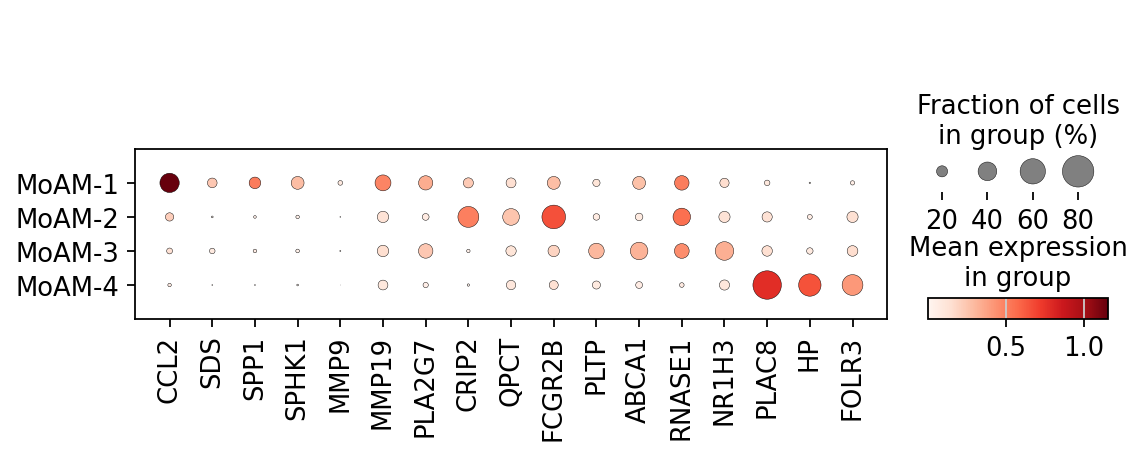

In [8]:
adata_moam = adata[adata.obs['cell_type'].str.startswith("MoAM-"), :].copy()
adata_moam.obs['cell_type'] = pd.Categorical(adata_moam.obs['cell_type'],
                                             categories = sorted(adata_moam.obs['cell_type'].unique()),
                                             ordered = True)
moam_markers = ['CCL2', 'SDS', 'SPP1', 'SPHK1', 'MMP9', 'MMP19', 'PLA2G7', 'CRIP2', 'QPCT', 'FCGR2B', 'PLTP',
                'ABCA1', 'RNASE1', 'NR1H3', 'PLAC8', 'HP', 'FOLR3']
sc.pl.dotplot(adata_moam, moam_markers, groupby = 'cell_type', show = False, swap_axes = False)
plt.savefig(f"{data_dir}/figures/fig_3/fig_3d.pdf", bbox_inches = "tight", transparent = True)

## Figure S3 a

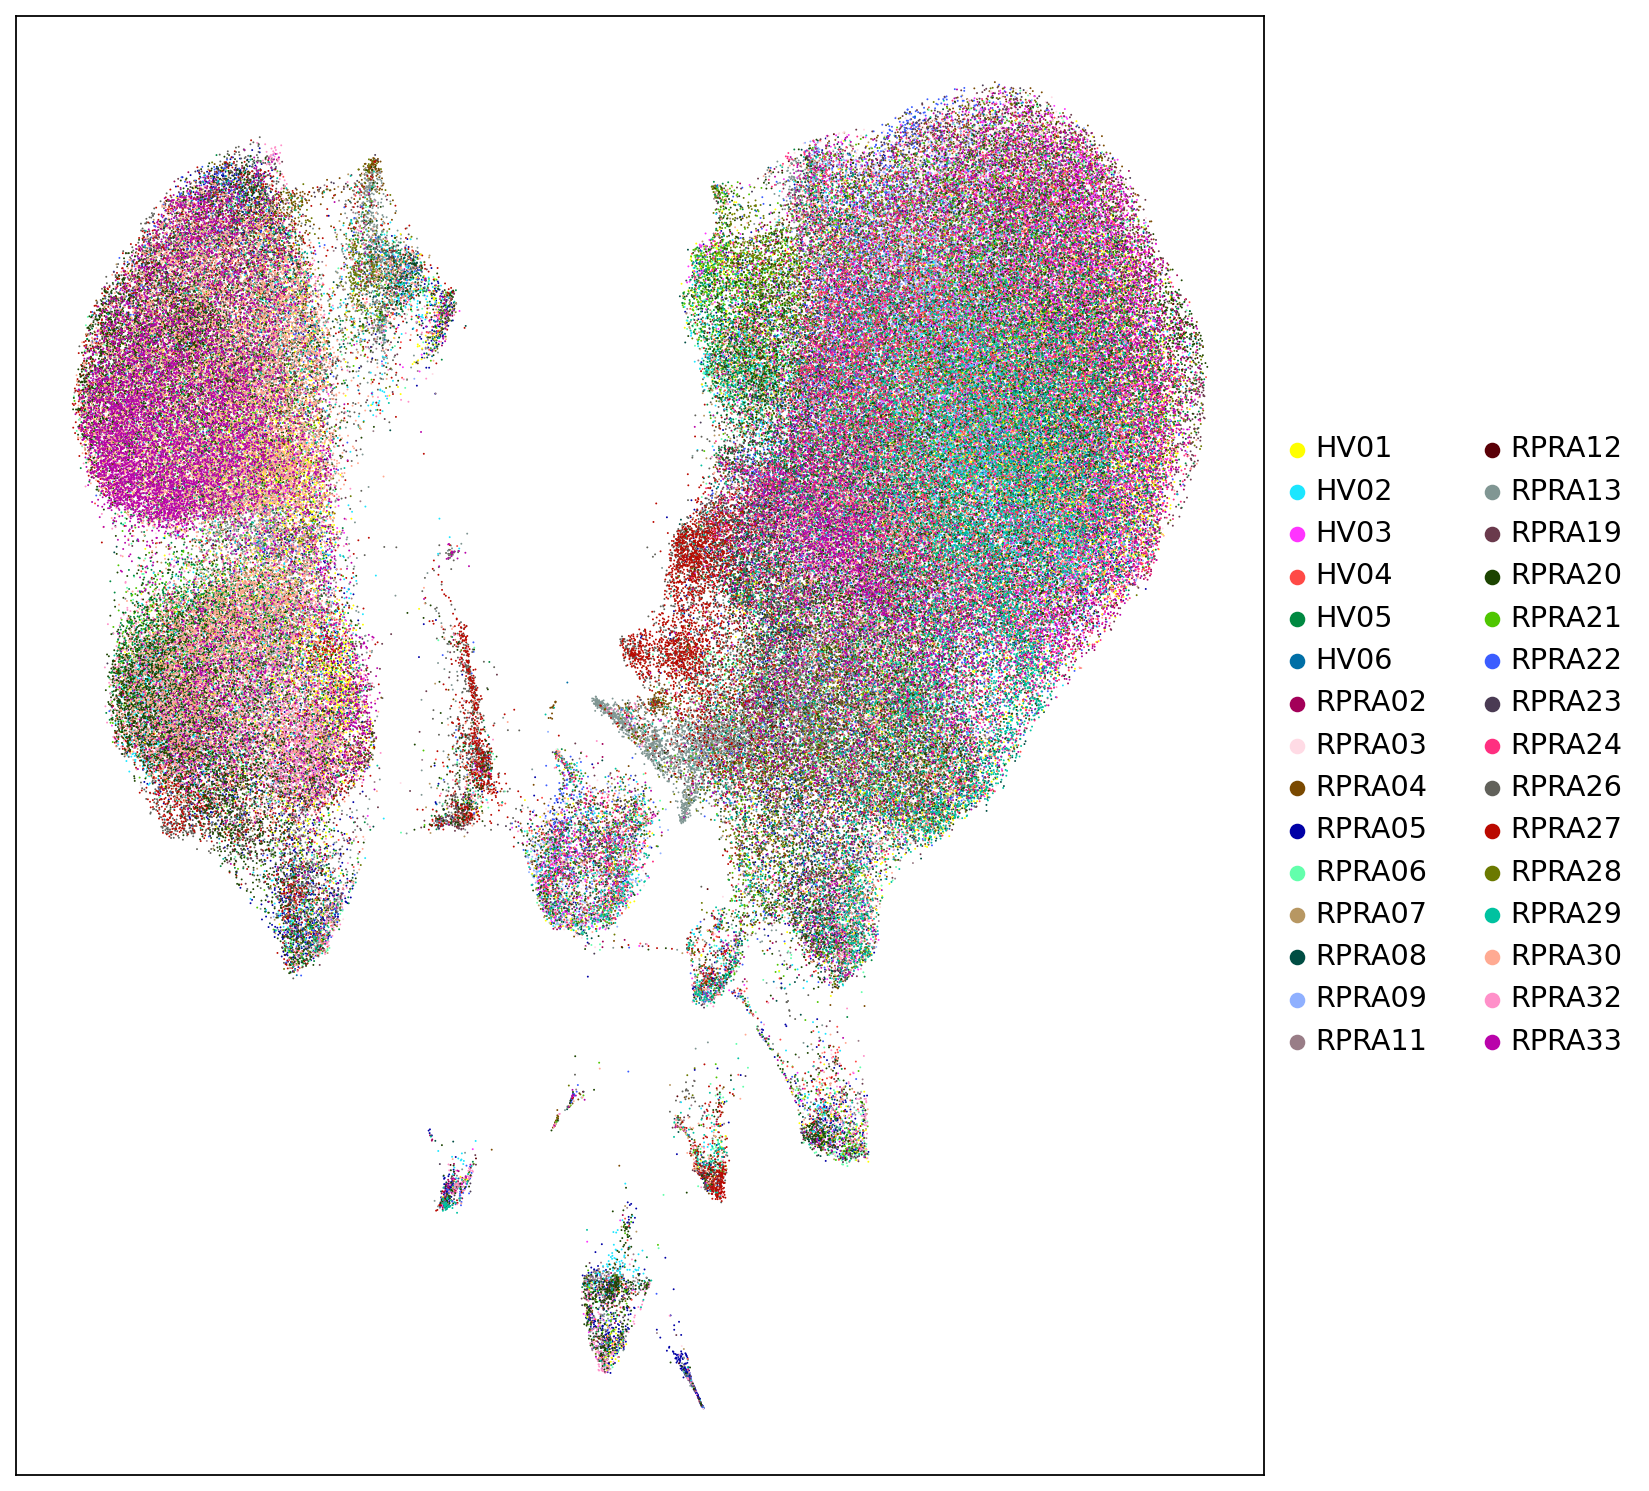

In [9]:
sc.set_figure_params(figsize = (10, 12))
fig, ax = plt.subplots()

sc.pl.umap(adata, ax = ax, show = False, title = '', color = 'Study_ID', size = 3)
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig(f"{data_dir}/figures/fig_s3/fig_s3_a.pdf", bbox_inches = "tight", transparent = True)

## Figure S3 b

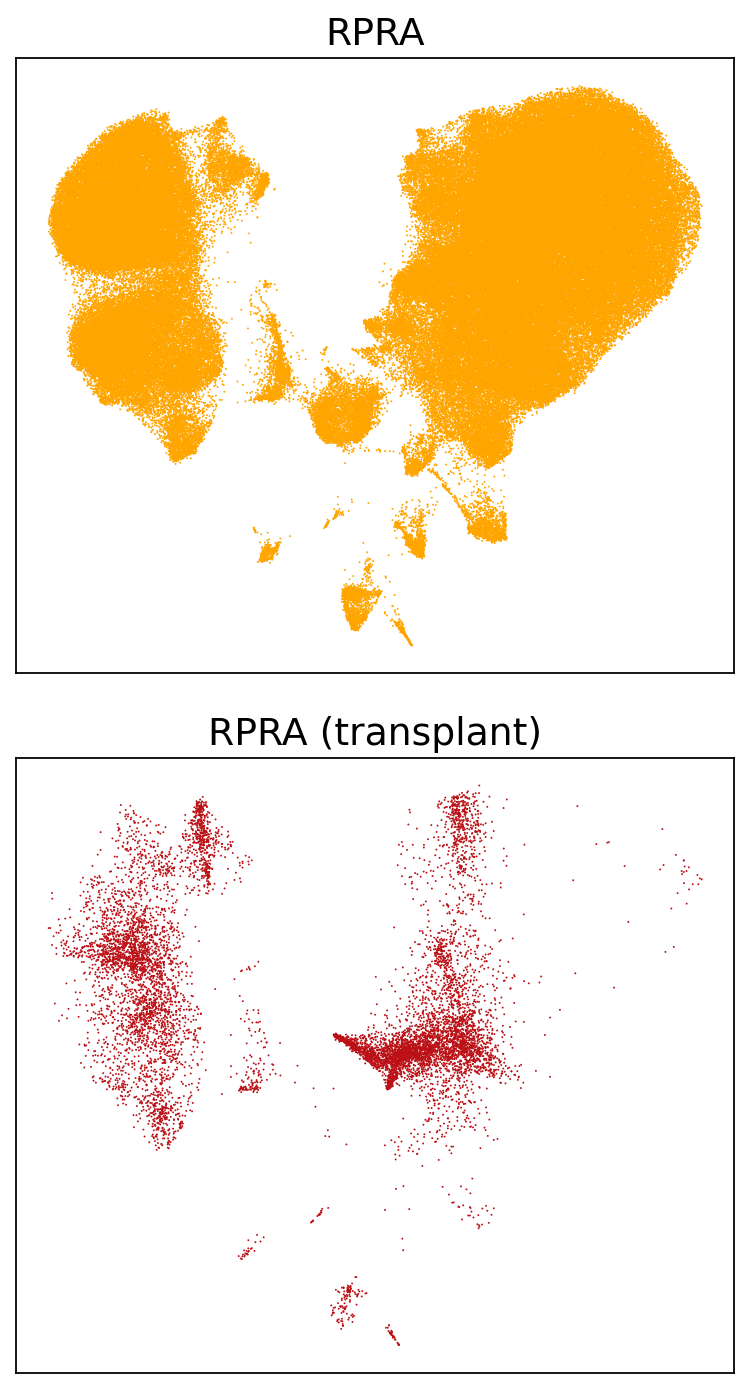

In [13]:
adata_rpra = adata[adata.obs.Status == 'RPRA'].copy()
adata_transplant = adata[adata.obs.Status == 'RPRA (transplant)'].copy()

sc.set_figure_params(figsize = (5, 9), fontsize = 17)
fig, ax = plt.subplots(2, 1)

pal = {'RPRA (transplant)': '#bb1116', 'RPRA': '#ffa500'}
ps = 3

sc.pl.umap(adata_rpra, ax = ax[0], show = False, title = 'RPRA', color = 'Status', palette = pal, size = 3)
sc.pl.umap(adata_transplant, ax = ax[1], show = False, title = 'RPRA (transplant)', color = 'Status',
           palette = pal, size = 3)

ax[0].get_legend().remove()
ax[0].set_xlabel('')
ax[0].set_ylabel('')
    
ax[1].get_legend().remove()
ax[1].set_xlabel('')
ax[1].set_ylabel('')

fig.tight_layout()
plt.savefig(f"{data_dir}/figures/fig_s3/fig_s3_b.pdf", bbox_inches = "tight", transparent = True)

## Figure S3 c

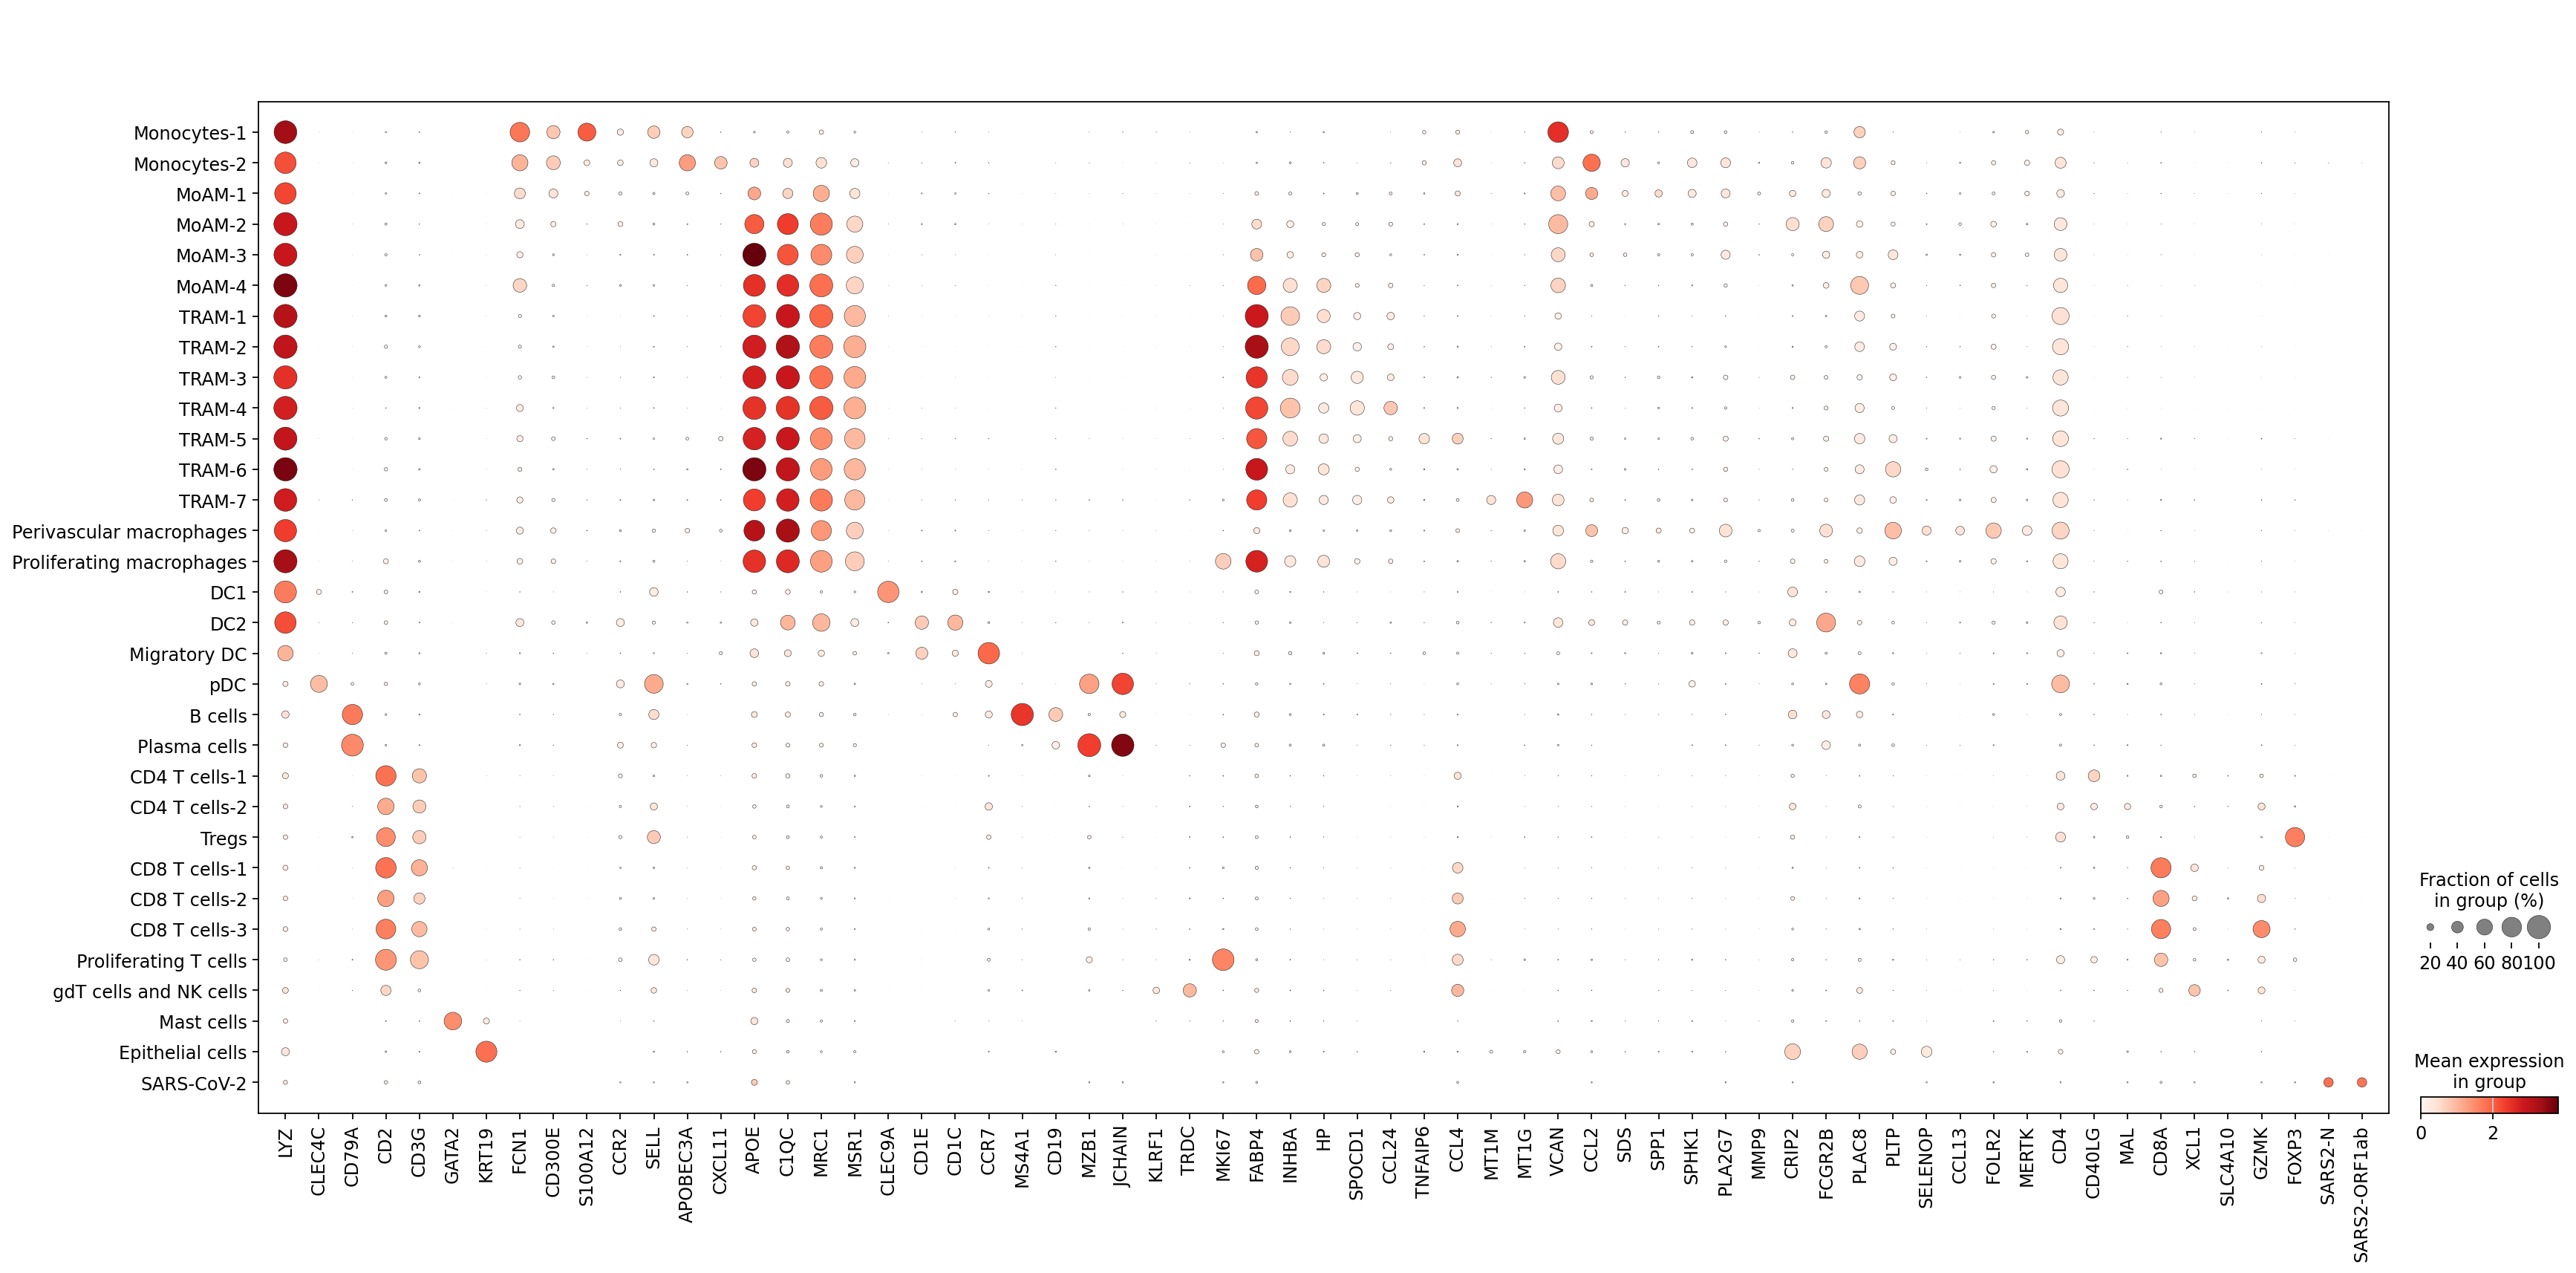

In [11]:
sc.set_figure_params(fontsize = 13)

markers = ["LYZ", "CLEC4C", "CD79A", "CD2", "CD3G", "GATA2", "KRT19",
           "FCN1", "CD300E", "S100A12", "CCR2", "SELL", "APOBEC3A", "CXCL11",
           "APOE", "C1QC", "MRC1", "MSR1",
           "CLEC9A", "CD1E", "CD1C", "CCR7",
           "MS4A1", "CD19", "MZB1", "JCHAIN",
           "KLRF1", "TRDC", "MKI67",
           "FABP4", "INHBA", "HP", "SPOCD1", "CCL24", "TNFAIP6", "CCL4", "MT1M", "MT1G",
           "VCAN", "CCL2", "SDS", "SPP1", "SPHK1", "PLA2G7", "MMP9", "CRIP2", "FCGR2B", "PLAC8", "PLTP",
           "SELENOP", "CCL13", "FOLR2", "MERTK",
           "CD4", "CD40LG", "MAL", "CD8A", "XCL1", "SLC4A10", "GZMK", "FOXP3",
           "SARS2__N", "SARS2__ORF1ab"]
cell_order = ['Monocytes-1', 'Monocytes-2', 'MoAM-1', 'MoAM-2', 'MoAM-3', 'MoAM-4',
              'TRAM-1', 'TRAM-2', 'TRAM-3', 'TRAM-4', 'TRAM-5', 'TRAM-6', 'TRAM-7', 'Perivascular macrophages',
              'Proliferating macrophages', 'DC1', 'DC2', 'Migratory DC','pDC', 'B cells', 'Plasma cells',
              'CD4 T cells-1', 'CD4 T cells-2', 'Tregs', 'CD8 T cells-1',
              'CD8 T cells-2', 'CD8 T cells-3', 'Proliferating T cells',  'gdT cells and NK cells',
              'Mast cells', 'Epithelial cells', 'SARS-CoV-2']

dotplot = sc.pl.dotplot(adata, markers, groupby = 'cell_type', categories_order = cell_order,
                        swap_axes = False, show = False)
dotplot['mainplot_ax'].set_xticklabels([x.replace('__', '-') for x in markers])
plt.savefig(f"{data_dir}/figures/fig_s3/fig_s3_c.pdf", bbox_inches = "tight", transparent = True)

## Figure S4 f

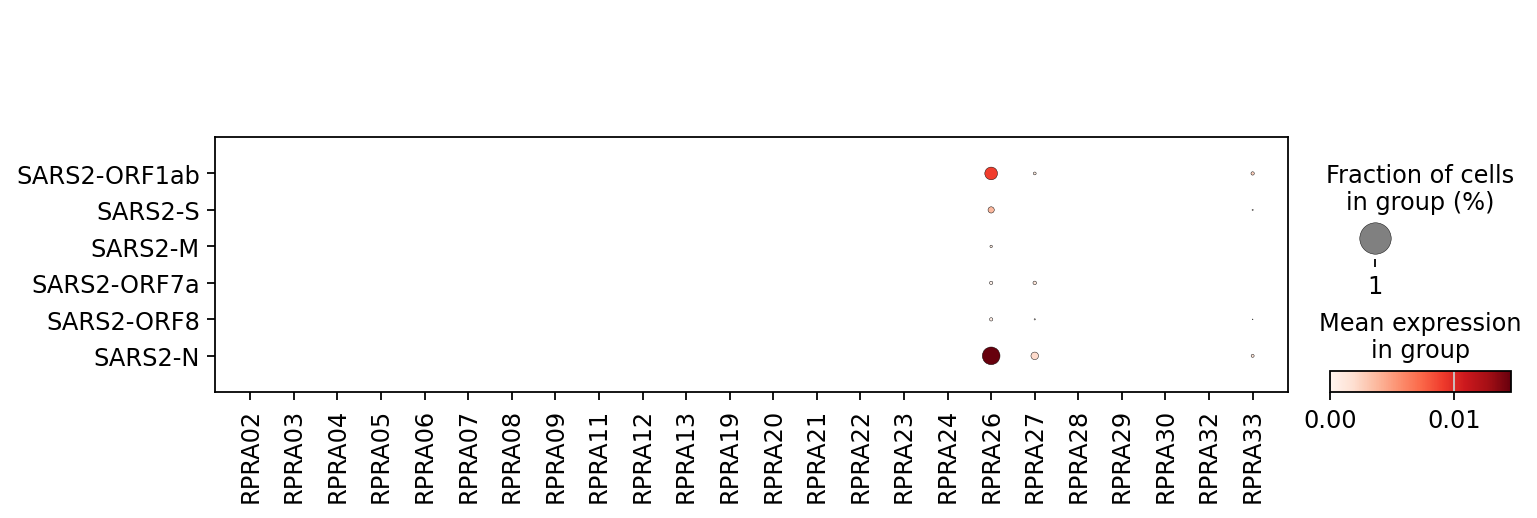

In [12]:
adata_rpra = adata[adata.obs.is_RPRA == "True"].copy()
sars_genes = [x for x in adata.raw.var.index if x[0:6] == "SARS2_"]

sc.set_figure_params(fontsize = 13)
dplt = sc.pl.dotplot(adata_rpra, sars_genes, groupby = 'Study_ID', swap_axes = True, dot_max = 0.01, show = False)
dplt['mainplot_ax'].set_yticklabels([x.replace('__', '-') for x in sars_genes])
plt.savefig(f"{data_dir}/figures/fig_s4/fig_s4_f.pdf", bbox_inches = "tight", transparent = True)